<a href="https://colab.research.google.com/github/nouhalahyen/Filtration_Control_Optimal/blob/main/TP_Kalman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Filtre de Kalman pour un oscillateur

_(Source : O. Herscovici-Schiller, Introduction au filtrage de Kalman et à la commande optimale)_

On considère un modèle simple d'oscillateur de raideur (éventuellement négative) variable, avec un frottement (éventuellement négatif) variable. On note $p(t)$ la position de la particule à tout instant $t$, et $v(t)$ sa vitesse à tout instant.

On rappelle que la vitesse est définie par l'équation différentielle suivante :

$$ \frac{\mathrm{d} p(t)}{\mathrm{d} t} = v(t)$$

Par ailleurs, l'évolution du système suit l'équation différentielle suivante :
$$ \frac{\mathrm{d} v(t)}{\mathrm{d}t} = a(t) p(t) + b(t) v(t)$$

Notons $\mathrm{X_c}$ le vecteur d'état du système, défini à tout instant $t$ par

$$\mathrm{X_c(t)} = \mathrm{A_c(t)}\mathrm{X_c(t)}$$



1. Montrer que l'évolution de $X_c$ obéit à une équation de la forme

$$ \frac{\mathrm{d}}{\mathrm{d}t} X_c(t) = A_c(t) X_c(t)$$

où l'on précisera les coefficients de la matrice $A_c$ en fonction des valeurs de $a(t)$ et $b(t)$.

2. On choisit une discrétisation de type Euler explicite:
$$X_c(t) \mapsto X_n$$
et
$$\frac{\mathrm{d}}{\mathrm{d}t} X_c(t) \mapsto (X_{n+1} - X_n)/ \Delta t $$

Montrer que cette discrétisation mène à un système discret de la forme

$$X_{n+1} = \mathrm{A} X_n$$

où l'on précisera la valeur de la matrice $\mathrm{A}$ en fonction de $\mathrm{A_c}$ et de $\Delta t$.



3. A partir de maintenant, et pour toute la suite de l'exercice, on prendra

$$X_0 = \begin{pmatrix}
1 \\
0
\end{pmatrix}$$

$$A_c = \begin{pmatrix}
0 & 1\\
-0.8 & -0.3
\end{pmatrix}$$

et on prendra $\Delta t = 0.1$. Simuler l'évolution du système pour $N_T = 200$ pas de temps. Afficher un graphique de l'évolution de la position $p$ du sytème au cours du temps. Est-ce bien l'allure attendue d'un oscillateur harmonique amorti ?

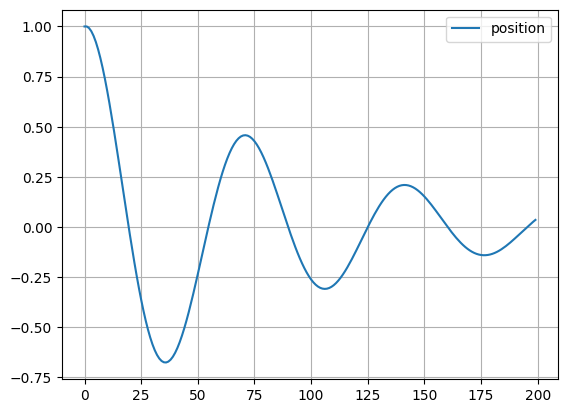

In [6]:

import numpy as np
import matplotlib.pyplot as plt

delta_t = 0.1
Nt = 200
X = np.zeros((2,Nt))
X[:,0] = np.array([1,0])
Ac = np.array([[0,1],[-0.8,-0.3]])
A = np.eye(2) + Ac * delta_t
for n in range(Nt-1):
    X[:,n+1] = A @ X[:,n]

plt.plot(X[0,:],label='position')
plt.grid(True)
plt.legend()
plt.show()

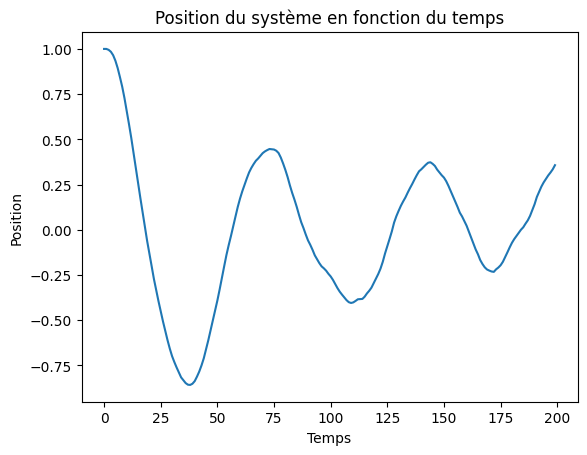

4. A présent, et uniquemetn pour cette question, on prend $\Delta T = 1$. Afficher sur un graphique l'évolution $p$ du système au cours du temps.
- Est-ce bien l'allure attendue d'un oscillateur harmonique amorti ?
- Comment expliquez-vous cette courbe ?

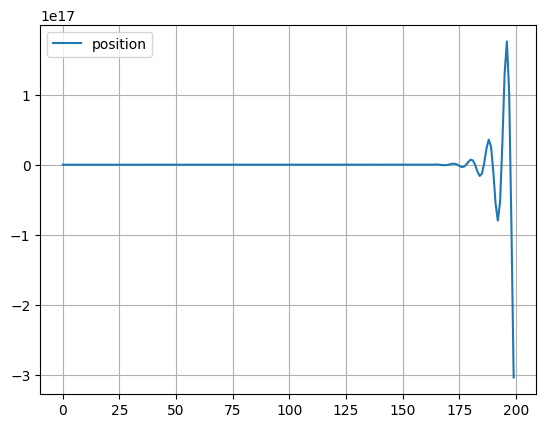

In [7]:

import numpy as np
import matplotlib.pyplot as plt

delta_t = 1
Nt = 200
X = np.zeros((2,Nt))
X[:,0] = np.array([1,0])
Ac = np.array([[0,1],[-0.8,-0.3]])
A = np.eye(2) + Ac * delta_t
for n in range(Nt-1):
    X[:,n+1] = A @ X[:,n]

plt.plot(X[0,:],label='position')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
plot_position(X)

NameError: name 'plot_position' is not defined

5. A présent, on reprend $\Delta t = 0.1$. On décide de simuler un oscillateur harmonique où s'ajoute une force aléatoire :
$X_{n+1} = A X_n + \phi_n $, où $\phi_n$ est défini à tout instant par
$$\phi_n = \begin{pmatrix}
0 \\
b_n
\end{pmatrix}
$$

où $b_n$ est un bruit blanc gaussien centré stationnaire d'écart type $\sigma = 0.04$. La matrice de covariance de $\phi$ est donc
$V_{\phi} = \begin{pmatrix}
0 & 0 \\
0 & \sigma^2 \\
\end{pmatrix}
$

- Vérifiez que vous avez bien repris $\Delta t = 0.1$
- Affichez sur un graphique l'évolution de la position $p$ au cours du temps.

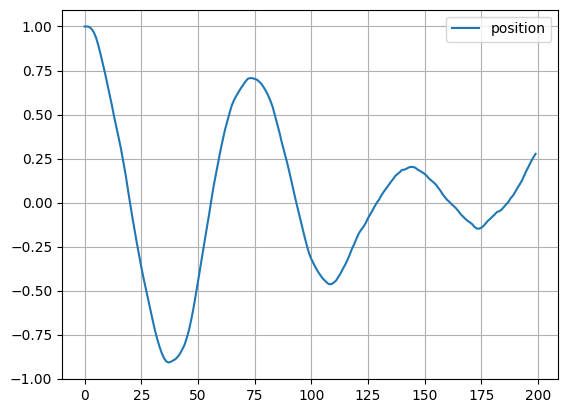

In [10]:
from sys import path_importer_cache
delta_t = 0.1
X = np.zeros((2,Nt))
X[:,0] = np.array([1,0])
Ac = np.array([[0,1],[-0.8,-0.3]])
A = np.eye(2) + Ac * delta_t
for n in range(Nt-1):
    bn = np.random.normal(0,0.04)
    phin = np.array([[0,bn]])
    X[:,n+1] = A @ X[:,n] + phin

plt.plot(X[0,:],label='position')
plt.grid(True)
plt.legend()
plt.show()


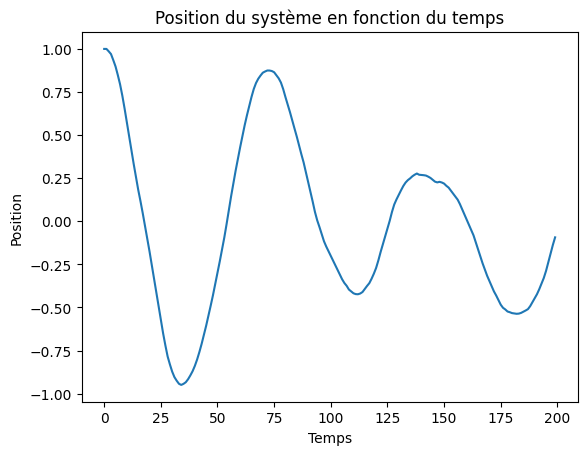


6. A présent, on ajoute un capteur de position : à tout instant, $y_{n+1} = \mathrm{C}\, x_{n+1} + \psi_{n+1}$. Le bruit $\psi$ est un bruit blanc gaussien centré d'écart type 0.1, et donc de variance $V_{\psi} = 0.01$. La matrice $\mathrm{C}$ vaut $\mathrm{C} = [1 0]$.


_Remarque : C est bien une matrice ligne de sorte que $\mathrm{CX} = p$. En météo, on dirait que $\mathrm{C}$ est un opérateur d'observation_

On introduit l'estimateur :
$$\hat{\mathrm{X}}_{n+1} = \mathrm{A}\hat{\mathrm{X}}_{n} + \mathrm{K}[y_{n+1} - \mathrm{CA}\hat{\mathrm{X}}_n]$$

On prend $\hat{\mathrm{X}}_0 = \begin{pmatrix}2 \\ 0\end{pmatrix}$

- Afficher sur le même graphe l'évolution au cours du temps de $p$, de l'estimée $\hat{p}$ de $p$ et de la mesure $y$ pour le cas où K = 0. Commenter.

<ipython-input-11-3b30ba42fd5c>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[n + 1] = C @ X[:, n + 1] + np.random.normal(0, np.sqrt(Vpsi))  # Measurement


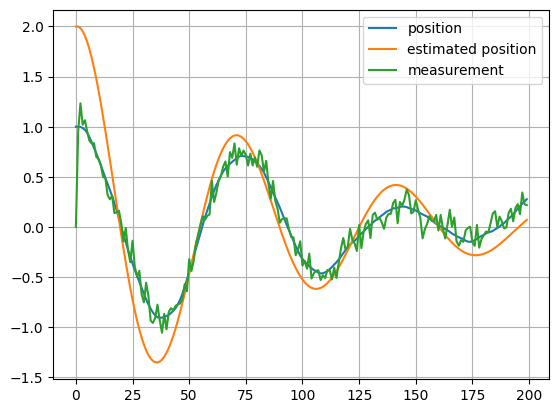

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# ... (Your existing code from previous questions) ...

# Question 6
C = np.array([[1, 0]])  # Observation matrix
Vpsi = 0.01  # Variance of measurement noise
K = 0  # Kalman gain (initially 0 for this question)

X_hat = np.zeros((2, Nt))  # Estimated state
X_hat[:, 0] = np.array([2, 0])  # Initial estimate

y = np.zeros(Nt)  # Measurement

for n in range(Nt - 1):
    # ... (Your existing code for state evolution with noise) ...

    y[n + 1] = C @ X[:, n + 1] + np.random.normal(0, np.sqrt(Vpsi))  # Measurement

    # Estimator update
    X_hat[:, n + 1] = A @ X_hat[:, n] + K * (y[n + 1] - C @ A @ X_hat[:, n])

# Plotting
plt.plot(X[0, :], label='position')
plt.plot(X_hat[0, :], label='estimated position')
plt.plot(y, label='measurement')
plt.grid(True)
plt.legend()
plt.show()

NameError: name 'plt' is not defined

Commentaire : La position estimée ne corrige pas le bruit de mesure et le bruit de position du à la force aléatoire, ce qui entraîne un écart entre la trajectoire réelle et la trajectoire estimée.

7. A présent, on met en place un filtre de Kalman, c'est à dire que K est donnée à chaque instant par :
$$\mathrm{K}_{n+1} = (\mathrm{AP_nA^TC^T} + V_{\phi}) \mathrm{C^T}(\mathrm{CAP_nA^TC^T} + \mathrm{CV_{\phi}} + \mathrm{V_{\psi}})^{-1}$$

où $\mathrm{P}$ suit l'équation de récurrence
$$\mathrm{P}_{n+1} = (I_d - \mathrm{K_{n+1}C})(\mathrm{AP_nA^T + V_{\phi}})$$

On initialisera $P$ par $P_0 = I_d$

In [ ]:
C = np.array([[1, 0],[0,0]])  # Observation matrix
P_n = np.array(Nt)
P_n[0] = eye(2)
Vpsi = 0.01  # Variance of measurement noise
for n in range(Nt - 1):
    K = (A@P_n[n]@A.T@C.T+Vpsi)@C.T@np.linalg.inv(C@A@P_n[n]@A.T@C + C@Vpsi@C.T + Vpsi)
    P_n[n+1] = (np.eye(2) - K@C)@(A@P_n[n]@A.T + Vpsi)
    X_hat[:, n + 1] = A @ X_hat[:, n] + K * (y[n + 1] - C @ A @ X_hat[:, n])

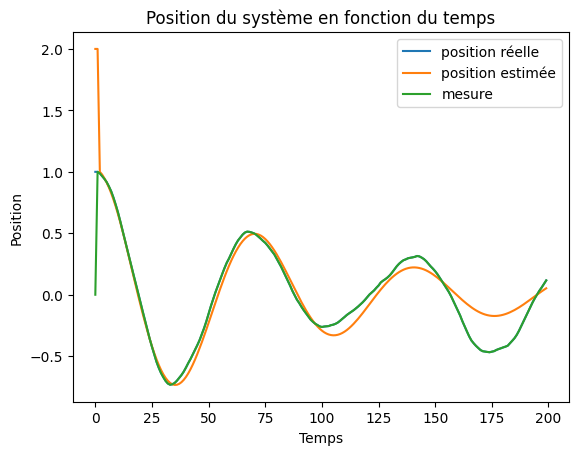

8. Comparer la courbe obtenue à la question 7 à la courbe obtenue à la question 6

9. Quelles sont la valeur finale P_T et la valeur finale K_T, toujours pour $P_0 = I_d$ ?

In [ ]:
print(K)
print(P)



A présent, on initialise le filtre de Kalman avec une covariance de l'erreur supposée nulle ($P_0 = 0$).
- Afficher sur le même graphe l'évolution au cours du temps de $p$, de l'estimée $\hat{p}$ de p et de la mesure y. Comparer à la courbe de la question précédente.  

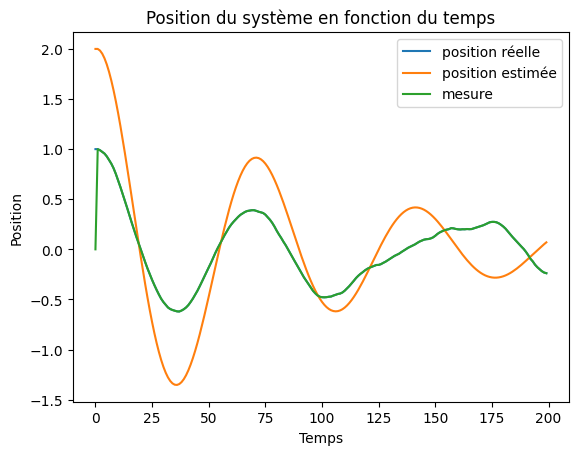

10. Noter les valeurs finales de $P_T$ et $K_T$ et comparer aux valeurs finales de $P$ et $K$ obtenues à la question précédente. Commenter.

[[0.]
 [0.]]
[[0. 0.]
 [0. 0.]]


11. A présent, on prend $V_{\psi} = 0$ et $C = I_d$.
- Calculer analytiquement la valeur de K à chaque pas de temps.
- Afficher simultanément l'évolution de $\hat{p}$, $p$ et $y$. Commenter.

12. A présent, on prend $V_{\psi} = 0.01$ et $C = [1, 0]$. Expliquez comment vous feriez pour ramener au plus vite la position vers 0 si vous aviez accès à la valeur de X.

13. Et si vous n'aviez pas accès à la valeur de X ? Afficher le graphe correspondant.